##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training our model will take just a few lines of code.


### Import TensorFlow

In [69]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

ERROR:root:Line magic function `%tensorflow_version` not found.


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [31]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


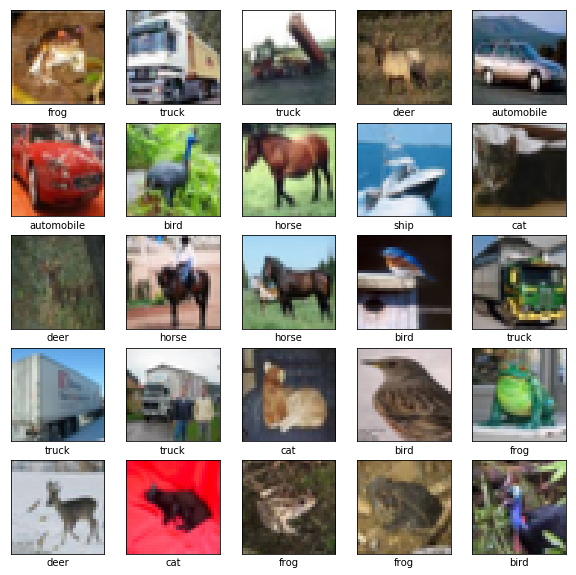

In [32]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Part 1 (MLP)
We are asked to modify the given perceptron.py file and experiment with 0,1 and 2 hidden layers. 

### Experiment with 0 hidden layers. 
This is basically what was given in the perceptron.py.
The Optimizer used is Adam, and it begins with the default learning rate of 0.001. The weights are also initialized by default according to glorot uniform distribution. 

In [39]:
#This is the modified perceptron.py
# 0 hidden layers (what was given...)
##we add the following to save the best weights and be able to evaluate early stopping.  
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save])



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.9601 - acc: 0.3172 - val_loss: 2.0545 - val_acc: 0.2920
Epoch 2/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.8736 - acc: 0.3531 - val_loss: 1.9049 - val_acc: 0.3400
Epoch 3/100
50000/50000 [==============================] - 4s 73us/step - loss: 1.8567 - acc: 0.3620 - val_loss: 1.7998 - val_acc: 0.3842
Epoch 4/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.8452 - acc: 0.3662 - val_loss: 1.9583 - val_acc: 0.3266
Epoch 5/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.8438 - acc: 0.3728 - val_loss: 1.8732 - val_acc: 0.3390
Epoch 6/100
50000/50000 [==============================] - 4s 72us/step - loss: 1.8188 - acc: 0.3800 - val_loss: 1.8773 - val_acc: 0.3390
Epoch 7/100
50000/50000 [==============================] - 4s 73us/step - loss: 1.8234 - acc: 0.3770 - val_loss: 1.8207 -

50000/50000 [==============================] - 4s 78us/step - loss: 1.7465 - acc: 0.4069 - val_loss: 1.8033 - val_acc: 0.3873
Epoch 60/100
50000/50000 [==============================] - 4s 77us/step - loss: 1.7296 - acc: 0.4141 - val_loss: 1.9346 - val_acc: 0.3531
Epoch 61/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.7324 - acc: 0.4117 - val_loss: 1.8212 - val_acc: 0.3807
Epoch 62/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.7394 - acc: 0.4099 - val_loss: 1.9446 - val_acc: 0.3517
Epoch 63/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.7386 - acc: 0.4122 - val_loss: 1.9214 - val_acc: 0.3475
Epoch 64/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.7351 - acc: 0.4105 - val_loss: 1.8465 - val_acc: 0.3817
Epoch 65/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.7333 - acc: 0.4133 - val_loss: 1.9036 - val_acc: 0.3591
Epoch 66/100
50000/50000 [==============

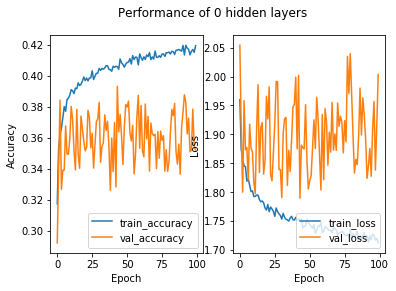

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [41]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))




10000/10000 [==============================] - 0s 37us/step
test_loss: 2.003669347000122
test_acc: 0.352
10000/10000 [==============================] - 0s 31us/step
best_test_loss: 1.7892036600112915
best_test_acc: 0.3932


### Evaluation of 0 hidden layers:
As is visible from the above printed results, and in the plots, the best parameters were found to predict the image with a test accuracy of 0.3932. These weights stem from iteration 44.

Is early stopping convenient in this application?
It depends on the patience one uses for early stopping. A patience of only 5 epochs, would not yield the best result that we have achieved here. However, after epoch 44, the model ran for 56 more epochs without improvement. Therefore early stopping would have saved quite some time. But as mentioned, the patience needs to be big enough. To illustrate: A best intermediate result was found at epoch 11, until epoch 31 this result was not improved. So even a patience of, say 15, would not have been a large enough choice. 

From the plots it is visible that the training accuracy and loss keep diverging more and more from the validation accuracy and loss, since this pattern is going to continue, it is unlikely that we will achieve much better results in future iterations. 


### Experiment with 1 hidden layers. 
The Optimizer used is Adam, and it begins with the default learning rate of 0.001. The weights are also initialized by default according to glorot uniform distribution. The hidden layer consists of 512 nodes. The activation function used is the relu function in the hidden layer and a softmax in the final layer to obtain normalized probabilities. 

In [45]:
#This is the modified perceptron.py
# 1 hidden layers 
##we add the following to save the best weights and be able to evaluate early stopping.  
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save])




Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 31s 629us/step - loss: 1.8934 - acc: 0.3252 - val_loss: 1.7426 - val_acc: 0.3783
Epoch 2/100
50000/50000 [==============================] - 31s 621us/step - loss: 1.7002 - acc: 0.3926 - val_loss: 1.6539 - val_acc: 0.4084
Epoch 3/100
50000/50000 [==============================] - 30s 604us/step - loss: 1.6260 - acc: 0.4224 - val_loss: 1.6018 - val_acc: 0.4233
Epoch 4/100
50000/50000 [==============================] - 31s 628us/step - loss: 1.5801 - acc: 0.4383 - val_loss: 1.5722 - val_acc: 0.4416
Epoch 5/100
50000/50000 [==============================] - 28s 557us/step - loss: 1.5519 - acc: 0.4454 - val_loss: 1.5588 - val_acc: 0.4471
Epoch 6/100
50000/50000 [==============================] - 30s 596us/step - loss: 1.5304 - acc: 0.4562 - val_loss: 1.5369 - val_acc: 0.4572
Epoch 7/100
50000/50000 [==============================] - 29s 571us/step - loss: 1.5117 - acc: 0.4619 - val_l

Epoch 59/100
50000/50000 [==============================] - 27s 535us/step - loss: 1.2815 - acc: 0.5424 - val_loss: 1.5177 - val_acc: 0.4692
Epoch 60/100
50000/50000 [==============================] - 29s 575us/step - loss: 1.2785 - acc: 0.5420 - val_loss: 1.5066 - val_acc: 0.4827
Epoch 61/100
50000/50000 [==============================] - 27s 538us/step - loss: 1.2765 - acc: 0.5421 - val_loss: 1.4951 - val_acc: 0.4843
Epoch 62/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.2777 - acc: 0.5423 - val_loss: 1.5346 - val_acc: 0.4708
Epoch 63/100
50000/50000 [==============================] - 26s 518us/step - loss: 1.2739 - acc: 0.5440 - val_loss: 1.5378 - val_acc: 0.4695
Epoch 64/100
50000/50000 [==============================] - 26s 523us/step - loss: 1.2734 - acc: 0.5446 - val_loss: 1.5333 - val_acc: 0.4727
Epoch 65/100
50000/50000 [==============================] - 26s 527us/step - loss: 1.2681 - acc: 0.5455 - val_loss: 1.5290 - val_acc: 0.4714
Epoch 66/100


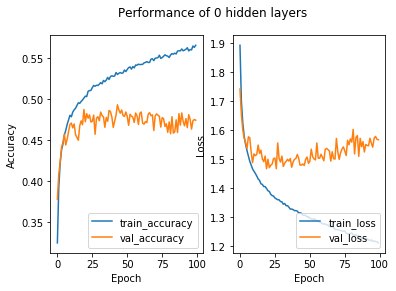

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [47]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))





10000/10000 [==============================] - 1s 115us/step
test_loss: 1.5677319553375244
test_acc: 0.4743
10000/10000 [==============================] - 1s 111us/step
best_test_loss: 1.4677813482284545
best_test_acc: 0.4805


### Evaluation of 1 hidden layers:
As is visible from the above printed results, and in the plots, the best parameters were found to predict the image with a test accuracy of 0.4805, which is a big improvement compared to no hidden layer with accuracy of 0.3847. These weights stem from iteration 44. Our result is about 0.025 worse than the result achieved with the same parameter sized model in https://arxiv.org/pdf/1611.03530.pdf. We will investigate in the second part of the assignment as to how we can improve upon them. 

Is early stopping convenient in this application?
In this case, we found that a smaller patience would have sufficed compared to the 0 hidden layer experiment. There were not such long sequences of non-improving epochs as in the previous experiment. Again, after epoch 44, the model ran for 56 more epochs without improvement. Therefore early stopping would have saved quite some time. 

From the plots it is visible that the training accuracy and loss keep diverging more and more from the validation accuracy and loss, since this pattern is probably going to continue, it is unlikely that we will achieve much better results in future iterations. This is most likely due to overfitting. 



### Experiment with 2 hidden layers. 
The Optimizer used is Adam, and it begins with the default learning rate of 0.001. 
We use a hidden layer with 128 and one with 256 nodes. We are restricted to 1 hour of CPU time. The weights are also initialized by default according to glorot uniform distribution. 

In [51]:
#This is the modified perceptron.py
# 0 hidden layers (what was given...)
##we add the following to save the best weights and be able to evaluate early stopping.  
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save])





Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 37s 749us/step - loss: 1.8489 - acc: 0.3292 - val_loss: 1.6961 - val_acc: 0.3840
Epoch 2/100
50000/50000 [==============================] - 35s 701us/step - loss: 1.6788 - acc: 0.3949 - val_loss: 1.6326 - val_acc: 0.4123
Epoch 3/100
50000/50000 [==============================] - 34s 671us/step - loss: 1.5993 - acc: 0.4245 - val_loss: 1.5794 - val_acc: 0.4360
Epoch 4/100
50000/50000 [==============================] - 32s 643us/step - loss: 1.5574 - acc: 0.4417 - val_loss: 1.5448 - val_acc: 0.4493
Epoch 5/100
50000/50000 [==============================] - 32s 643us/step - loss: 1.5221 - acc: 0.4532 - val_loss: 1.5065 - val_acc: 0.4638
Epoch 6/100
50000/50000 [==============================] - 33s 655us/step - loss: 1.4971 - acc: 0.4644 - val_loss: 1.5213 - val_acc: 0.4611
Epoch 7/100
50000/50000 [==============================] - 32s 650us/step - loss: 1.4751 - acc: 0.4746 - val_l

Epoch 59/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1599 - acc: 0.5827 - val_loss: 1.7391 - val_acc: 0.4622
Epoch 60/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1606 - acc: 0.5813 - val_loss: 1.6470 - val_acc: 0.4815
Epoch 61/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1596 - acc: 0.5822 - val_loss: 1.6653 - val_acc: 0.4742
Epoch 62/100
50000/50000 [==============================] - 29s 583us/step - loss: 1.1577 - acc: 0.5809 - val_loss: 1.7021 - val_acc: 0.4728
Epoch 63/100
50000/50000 [==============================] - 34s 683us/step - loss: 1.1571 - acc: 0.5845 - val_loss: 1.6494 - val_acc: 0.4681
Epoch 64/100
50000/50000 [==============================] - 39s 778us/step - loss: 1.1532 - acc: 0.5854 - val_loss: 1.7178 - val_acc: 0.4715
Epoch 65/100
50000/50000 [==============================] - 34s 684us/step - loss: 1.1465 - acc: 0.5852 - val_loss: 1.6690 - val_acc: 0.4719
Epoch 66/100


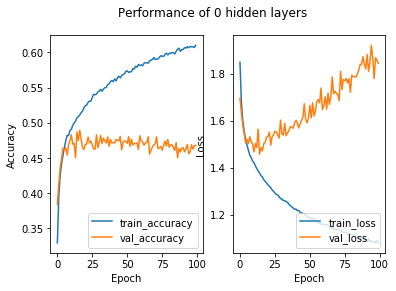

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [53]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))






10000/10000 [==============================] - 1s 148us/step
test_loss: 1.8447132152557373
test_acc: 0.4679
10000/10000 [==============================] - 1s 147us/step
best_test_loss: 1.4579067630767821
best_test_acc: 0.4868


### Evaluation of 2 hidden layers:
As is visible from the above printed results, and in the plots, the best parameters were found to predict the image with a test accuracy of 0.4868, which is a very small improvement compared to 1 hidden layer with accuracy of 0.4805. These weights stem from iteration 17. 

Is early stopping convenient in this application?
We can see a pattern emerging, that is, the more layers and with that the more parameters, the more reliable one could use early stopping. In this case the best performance was already reached after 17 iterations, so one could have saved 83 iterations. With 1 hidden layer, we would already be able to use a much smaller patience compared to 0 hidden layers. With 2 hidden layers, a patience of 5 iterations would have sufficed. 

From the plots it is visible that the training accuracy and loss keep diverging more and more from the validation accuracy and loss, since this pattern is going to continue, it is unlikely that we will achieve much better results in future iterations. This is likely due to overfitting. 



## Part 2 (Try our best to beat the baseline) 
We are asked to run the MLP with one hidden layer and compare our models performance with the results in Table 1 of https://arxiv.org/pdf/1611.03530.pdf. Their model uses a hidden layer of 512 nodes. We have 1000 Epochs or 2 hours of CPU time for training. 

As a first attempt, we will reuse the model with 1-hidden layer and use SGD instead of Adam. In the paper that we compare to, they also used SGD. just introduce a decreasing learning rate, once improvement in validation loss has plateaued. We decrease learning rate starting from 0.01 every 

In [74]:
#This is the modified perceptron.py
# 1 hidden layers 
##we add the following to save the best weights and be able to evaluate early stopping.  
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)
#sgd = optimizers.SGD(lr=0.01)

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save,reduce_lr])





Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 34s 677us/step - loss: 1.8693 - acc: 0.3353 - val_loss: 1.6902 - val_acc: 0.3983
Epoch 2/100
50000/50000 [==============================] - 33s 653us/step - loss: 1.6834 - acc: 0.3985 - val_loss: 1.6833 - val_acc: 0.3925
Epoch 3/100
50000/50000 [==============================] - 32s 643us/step - loss: 1.6179 - acc: 0.4252 - val_loss: 1.5803 - val_acc: 0.4406
Epoch 4/100
50000/50000 [==============================] - 33s 668us/step - loss: 1.5851 - acc: 0.4366 - val_loss: 1.5998 - val_acc: 0.4292
Epoch 5/100
50000/50000 [==============================] - 32s 642us/step - loss: 1.5540 - acc: 0.4448 - val_loss: 1.5450 - val_acc: 0.4484
Epoch 6/100
50000/50000 [==============================] - 32s 639us/step - loss: 1.5321 - acc: 0.4564 - val_loss: 1.6176 - val_acc: 0.4215
Epoch 7/100
50000/50000 [==============================] - 34s 673us/step - loss: 1.5142 - acc: 0.4643 - val_l

50000/50000 [==============================] - 39s 775us/step - loss: 1.2345 - acc: 0.5652 - val_loss: 1.4383 - val_acc: 0.4932
Epoch 56/100
50000/50000 [==============================] - 39s 783us/step - loss: 1.2343 - acc: 0.5650 - val_loss: 1.4374 - val_acc: 0.4979
Epoch 57/100
50000/50000 [==============================] - 33s 663us/step - loss: 1.2343 - acc: 0.5650 - val_loss: 1.4368 - val_acc: 0.4982
Epoch 58/100
50000/50000 [==============================] - 35s 701us/step - loss: 1.2340 - acc: 0.5647 - val_loss: 1.4381 - val_acc: 0.4980
Epoch 59/100
50000/50000 [==============================] - 34s 682us/step - loss: 1.2340 - acc: 0.5652 - val_loss: 1.4376 - val_acc: 0.4966
Epoch 60/100
50000/50000 [==============================] - 42s 834us/step - loss: 1.2336 - acc: 0.5648 - val_loss: 1.4388 - val_acc: 0.4948
Epoch 61/100
50000/50000 [==============================] - 30s 603us/step - loss: 1.2337 - acc: 0.5649 - val_loss: 1.4380 - val_acc: 0.4973
Epoch 62/100
50000/50000 [

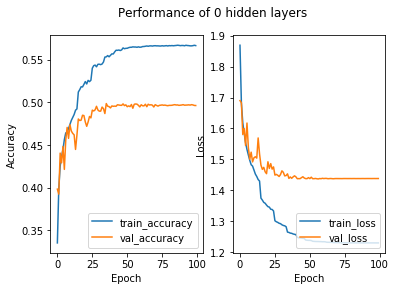

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

In [76]:
#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

10000/10000 [==============================] - 1s 109us/step
test_loss: 1.4381343738555907
test_acc: 0.4964
10000/10000 [==============================] - 1s 117us/step
best_test_loss: 1.436751766395569
best_test_acc: 0.4982


We definetly got closer to the baseline of 50.5 compared to doing the same thing without reducing the learning rate. Having observed that we reached the minimum learning rate towards 3/4 of the process, let's make the hidden layer contain more nodes, but introduce early stopping to stay within 1 hour of cpu time. 

In [78]:
#This is the modified perceptron.py
# 1 hidden layers 
##we add the following to save the best weights and be able to evaluate early stopping.  
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
mcp_save = ModelCheckpoint('best_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)
earl_stop= EarlyStopping(monitor='val_loss',
                              patience=10,
                              verbose=1)
#sgd = optimizers.SGD(lr=0.01)

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),callbacks=[mcp_save,reduce_lr,earl_stop])






Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 63s 1ms/step - loss: 1.9589 - acc: 0.3299 - val_loss: 1.7083 - val_acc: 0.3931
Epoch 2/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.6925 - acc: 0.3970 - val_loss: 1.6380 - val_acc: 0.4153
Epoch 3/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.6183 - acc: 0.4267 - val_loss: 1.6219 - val_acc: 0.4266
Epoch 4/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.5743 - acc: 0.4428 - val_loss: 1.5610 - val_acc: 0.4402
Epoch 5/100
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5394 - acc: 0.4529 - val_loss: 1.5178 - val_acc: 0.4585
Epoch 6/100
50000/50000 [==============================] - 60s 1ms/step - loss: 1.5122 - acc: 0.4628 - val_loss: 1.5808 - val_acc: 0.4313
Epoch 7/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4869 - acc: 0.4705 - val_loss: 1.5448 - 

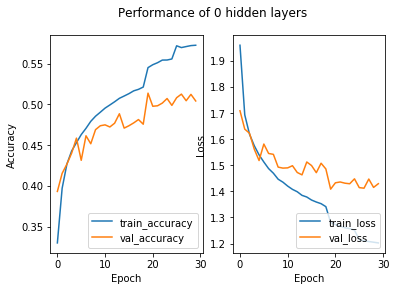

10000/10000 [==============================] - 2s 214us/step
test_loss: 1.4290987867355347
test_acc: 0.5041
10000/10000 [==============================] - 2s 177us/step
best_test_loss: 1.4083165256500245
best_test_acc: 0.5137


In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

As is visible from the last print statement, this model beats the baseline and stops after 30 epochs, where one epoch approximately takes 60 seconds CPU time. So we could put even more nodes in it and stay within 60 epochs. 
Let's do that and see what happens. To be continued....

## Part 3 (ConvNet)
We are asked to compare results on the given ConvNet when using ReLu or tanh() as activation functions. 
Also, we should experiment with at least two different optimizers and report results. 
The following code was given. 

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.



In [81]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our model so far.

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [83]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Here's the complete architecture of our model.

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_27 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                65600     
__________

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

### Compile and train the model

In [85]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
14016/50000 [=======>......................] - ETA: 52s - loss: 1.8286 - acc: 0.3153

KeyboardInterrupt: 

### Evaluate the model

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

In [16]:
print(test_acc)

0.6926


Our simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, see an example using the Keras subclassing API and a `tf.GradientTape` [here](https://www.tensorflow.org/tutorials/quickstart/advanced).

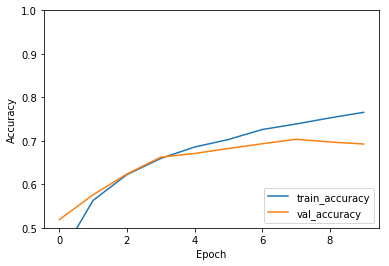

In [17]:
plt.show()

#### The same but then with tanh instead of ReLu

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

#### ReLu again but with SGD as optimizer instead of Adam

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))




In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Performance of 0 hidden layers')

ax1.plot(history.history['acc'], label='train_accuracy')
ax1.plot(history.history['val_acc'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='train_loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower right')

plt.show()

#first we evaluate on the last weights of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss: "+str(test_loss) + '\n' + "test_acc: "+ str(test_acc))
model.load_weights('best_weights.hdf5')
best_test_loss, best_test_acc = model.evaluate(test_images, test_labels)
print("best_test_loss: "+str(best_test_loss) + '\n' + "best_test_acc: "+ str(best_test_acc))

### Part 4 (Improving ConvNet) 
Now we are asked to outperform the given ConvNet but keep using approximately the same amount of parameters. 